----

# Tienda Online Ice

## Librerias y Carga de Datos

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot  as plt

In [3]:
games_df =  pd.read_csv("/datasets/games.csv")
games_df.info()
print(games_df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                                           Name Platform  Year_of_Release  \
352                              FIFA Soccer 10      PS3           2009.0   
11718                      Fate/Tiger Colosseum      PSP           2007.0   
10028     

## Preparacion de Datos

In [4]:
# Nombres de columnas en minusculas
def lower_df(df):
    cols_mod = []

    for cols in df.columns:
        col_diff = cols.lower()    
        cols_mod.append(col_diff)
    return cols_mod
games_df.columns = lower_df(games_df)
print(games_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
games_df["user_score"] = games_df["user_score"].replace("tbd", None)
games_df["user_score"] = pd.to_numeric(games_df["user_score"])

In [6]:
# Identificacion de valores Nulos
games_df["name"].fillna("Titulo no registrado", inplace= True)
games_df["genre"].fillna("No registrado", inplace= True)
games_df["year_of_release"].fillna(0, inplace= True)
games_df["critic_score"].fillna(0, inplace= True)
games_df["user_score"].fillna(0, inplace= True)
games_df["rating"].fillna("tbd", inplace= True)

# Cambio de tipo de variable
games_df["year_of_release"] = games_df["year_of_release"].astype(int)
games_df["user_score"] = games_df["user_score"].astype(float)

print(games_df.isnull().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


* Decidi no eliminar ningun valor ausente ya que podria representar informacion valiosa mas adelante.
* Eleji reemplazar y no eliminar porque me encontre con cierto patrones donde justifico esta decision, por ejemplo:
  * Juego sin titulo registrado con mas de 1 millon de dolares en ventas en una de las regiones.

In [7]:
# Identificacion de valores duplicados explicitos
print(games_df.duplicated().sum())

0


* No se encontro ninugn valor duplicado.

In [8]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Ingenieria de Datos

In [9]:
# Ventas totales de cada juego
games_df["total_sales"] = games_df["na_sales"] + games_df["eu_sales"] + games_df["jp_sales"] + games_df["other_sales"]

## Analisis de Datos

In [10]:
# Cantidad de juegos lanzados en cada año
year_count = games_df.groupby(by= "year_of_release")["name"].count()
print(year_count.sort_values(ascending= False))

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64


* El año con mas juegos lanzados a la venta fue el 2008!

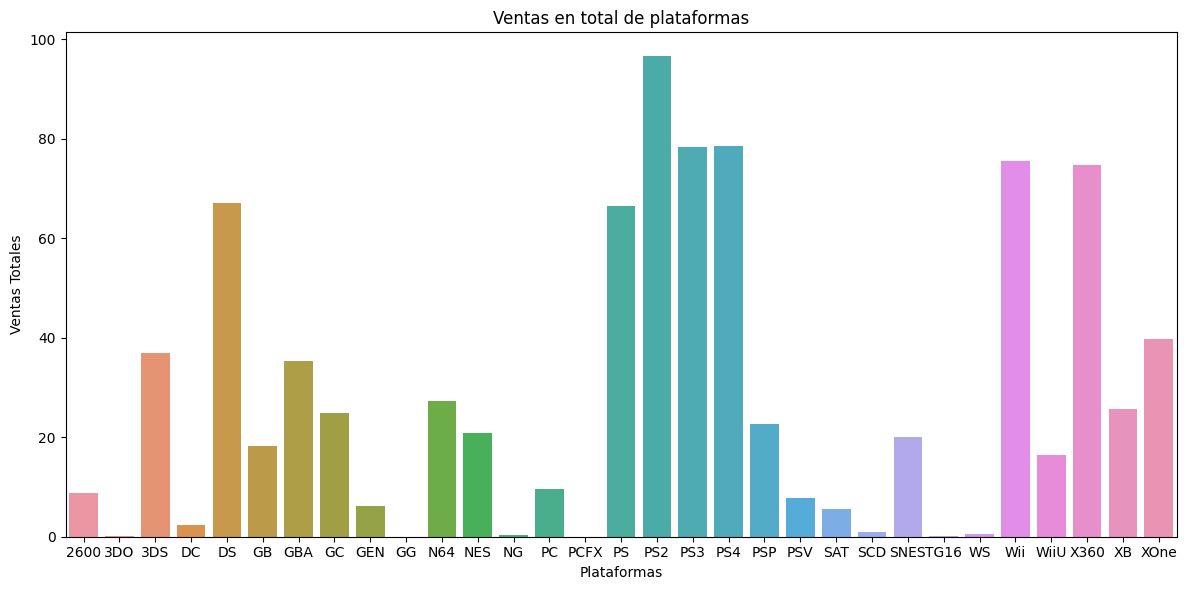

In [11]:
# Plataformas con mayor numero de ventas totales
sales_research = games_df.groupby(by= ['platform', 'year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize= (12, 6))
sns.barplot(data= sales_research, x= "platform", y= "total_sales", ci= None)

plt.title("Ventas en total de plataformas")
plt.xlabel("Plataformas")
plt.ylabel("Ventas Totales")
plt.tight_layout()
plt.show()

* Las plataformas de juegos mas famosas antes determinado por su total de ventas en el mundo fueron "PS2" y "Wii", las ventas de sus juegos han bajado debido a que seguramente gracias a las actualizaciones de entornos de juego para reproducir los juegos han aumentado la calidad de los mismo brindando una mejor experiencia al usuario po lo cual suelen optar por comprar mayor numero de estos actualmente.
* Generalmente poseen un periodo de tiempo pico en donde son mas notorios sus promociones y ventas siendo en la mayoria de los casos 4 o 5 años diferentes de ventas de la misma consola o plataforma.

In [12]:
# Periodo de Datos seleccionado
games_sample = games_df[games_df["year_of_release"] >= 2014].sort_values(by= "year_of_release")

In [13]:
print(games_sample["year_of_release"])

5246     2014
6628     2014
16294    2014
6678     2014
12502    2014
         ... 
12382    2016
12387    2016
12391    2016
11891    2016
16714    2016
Name: year_of_release, Length: 1689, dtype: int64


In [14]:
# Plataformas lideres en ventas
plat_grp = games_df.groupby(by= "platform")["total_sales"].sum().sort_values(ascending= False)
print(plat_grp)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


* Las primeras 3 plataformas que logramos observar con mayor numero de ventas totales es:
  * PS2
  * XBOX
  * PS3

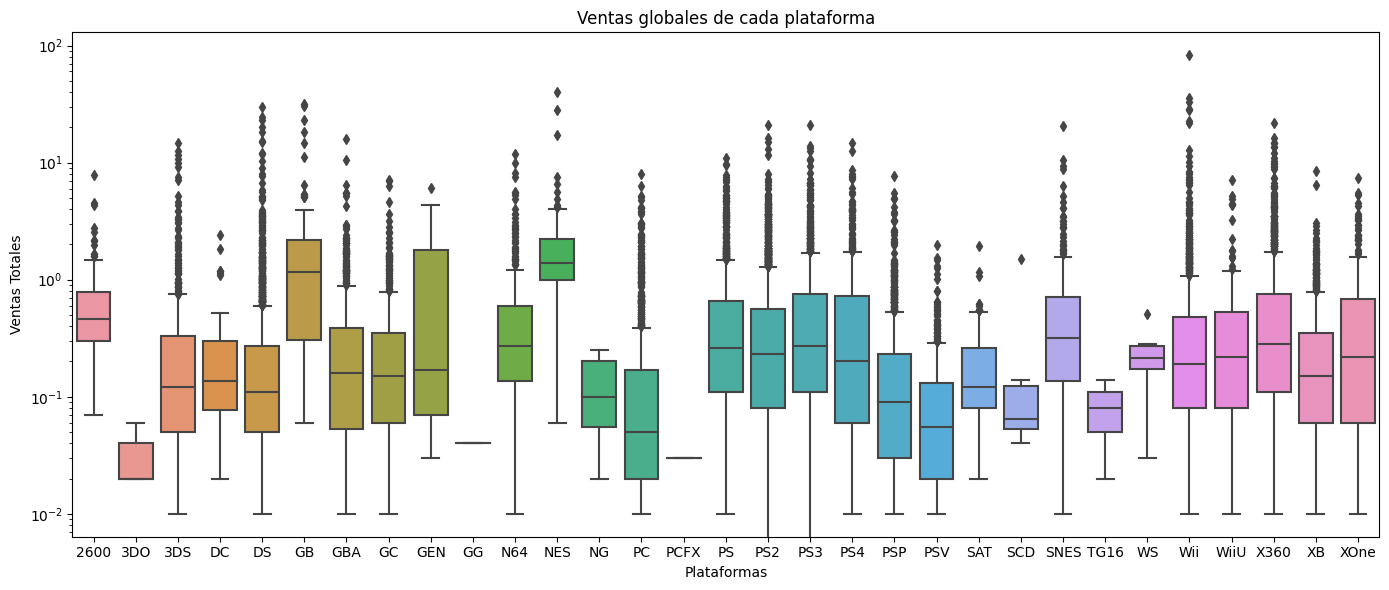

In [15]:
# Diagrama de Caja representando ventas globales de todos los juegos por plataforma
box_grp = games_df.groupby(by=["platform", "name"])["total_sales"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.boxplot(data=box_grp, x="platform", y="total_sales")

plt.yscale("log")

plt.title("Ventas globales de cada plataforma")
plt.xlabel("Plataformas")
plt.ylabel("Ventas Totales")
plt.tight_layout()
plt.show()

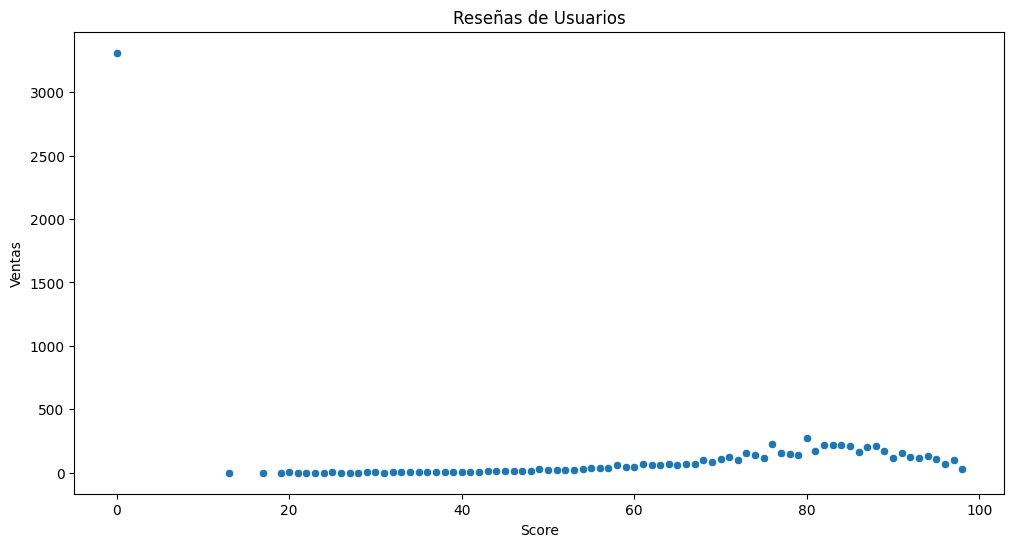

In [16]:
# Diagrama de Dispersion representando las reseñas de los usuarios 
scat_grp = games_df.groupby(by= ["critic_score"])["total_sales"].sum().reset_index()
plt.figure(figsize= (12, 6))
sns.scatterplot(data= scat_grp, x= "critic_score", y= "total_sales")

plt.title("Reseñas de Usuarios")
plt.xlabel("Score")
plt.ylabel("Ventas")
plt.show()

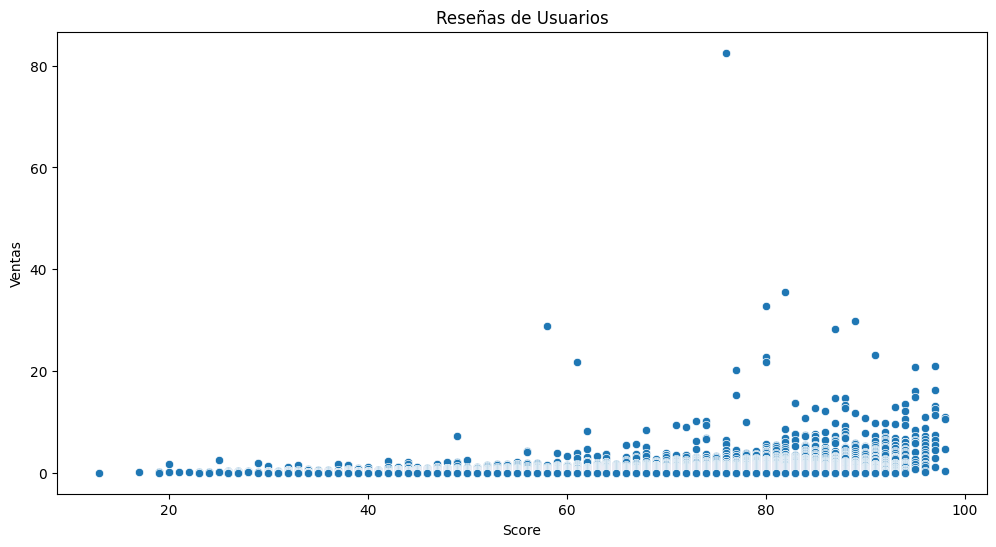

In [18]:
# Diagrama de Dispersion representando las reseñas de los usuarios 

plt.figure(figsize= (12, 6))
sns.scatterplot(data= games_df.query('critic_score!=0'), x= "critic_score", y= "total_sales")

plt.title("Reseñas de Usuarios")
plt.xlabel("Score")
plt.ylabel("Ventas")
plt.show()

In [19]:
# Correlacion entre critic_score y total_sales
correlacion = games_df['critic_score'].corr(games_df['total_sales'])

print("Correlación:", correlacion)

Correlación: 0.1486373734633441


* Existe una leve tendencia a que los juegos con mejores puntuaciones de crítica vendan más, pero no es una relación fuerte.

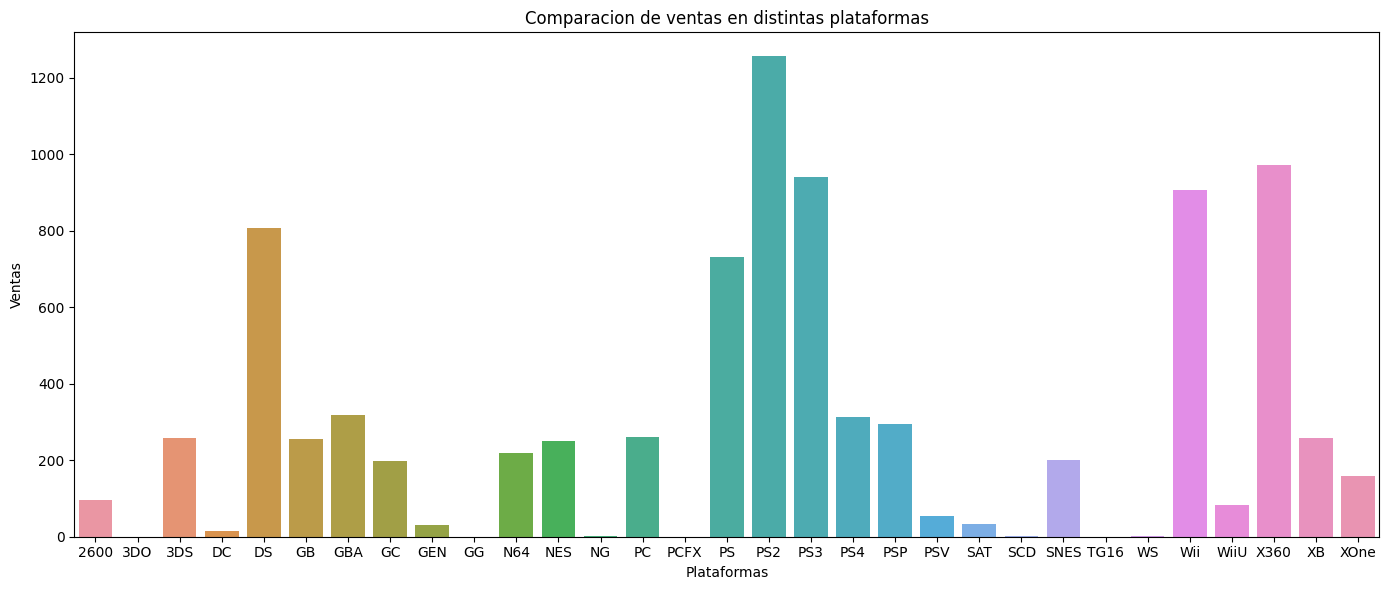

In [20]:
# Comparacion de Ventas de juegos en diferentes plataformas
bar_grp = games_df.groupby(by= ["platform"])["total_sales"].sum().reset_index()
plt.figure(figsize= (14, 6))
sns.barplot(data= bar_grp, x= "platform", y= "total_sales")

plt.title("Comparacion de ventas en distintas plataformas")
plt.xlabel("Plataformas")
plt.ylabel("Ventas")
plt.tight_layout()
plt.show()

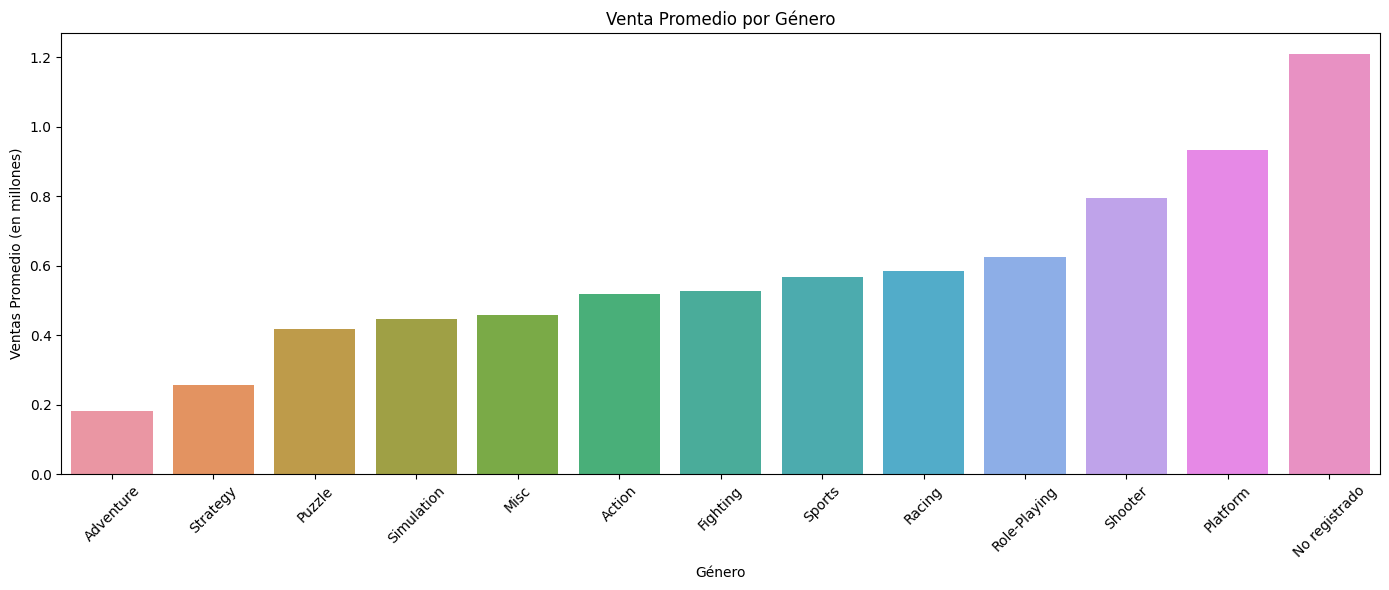

In [21]:
# Distribucion general de los juegos por genero y comparacion acerca de su popularidad por genero vs su venta
games_grby = games_df.groupby(by= "genre")["total_sales"].mean().sort_values().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data= games_grby, x="genre", y="total_sales")

plt.title("Venta Promedio por Género")
plt.xlabel("Género")
plt.ylabel("Ventas Promedio (en millones)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Perfil de Usuario de cada Region

In [22]:
# Plataformas principales de cada region
na_grp = games_df.groupby(by= "platform")["na_sales"].sum().sort_values(ascending= False)
print(na_grp.head())  # Plataformas de NA
print()
eu_grp = games_df.groupby(by= "platform")["eu_sales"].sum().sort_values(ascending= False)
print(eu_grp.head())  # Plataformas de Europa
print()
jp_grp = games_df.groupby(by= "platform")["jp_sales"].sum().sort_values(ascending= False)
print(jp_grp.head())  # Plataformas de Japon
print()
others_grp = games_df.groupby(by= "platform")["other_sales"].sum().sort_values(ascending= False)
print(others_grp.head()) #Plataformas  de otros paises

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

platform
PS2     193.44
PS3     135.68
X360     85.76
Wii      79.07
DS       59.26
Name: other_sales, dtype: float64


In [23]:
# Generos principales de cada region
na_gen_grp = games_df.groupby(by= "genre")["na_sales"].sum().sort_values(ascending= False)
print(na_gen_grp.head())  #NA generos
print()
eu_gen_grp = games_df.groupby(by= "genre")["eu_sales"].sum().sort_values(ascending= False)
print(eu_gen_grp.head())  #Europa generos
print()
jp_gen_grp = games_df.groupby(by= "genre")["jp_sales"].sum().sort_values(ascending= False)
print(jp_gen_grp.head())  #Japon generos
print()
others_gen_grp = games_df.groupby(by= "genre")["other_sales"].sum().sort_values(ascending= False)
print(others_gen_grp.head()) #Other Regions generos

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

genre
Action     184.60
Sports     134.51
Shooter    104.11
Racing      76.10
Misc        74.39
Name: other_sales, dtype: float64


In [24]:
# Rating en cada region buscando diferencias gracias a esta
na_rate_grp = games_df.groupby(by= "rating")["na_sales"].sum().sort_values(ascending= False)
print(na_rate_grp.head())  #NA rating
print()
eu_rate_grp = games_df.groupby(by= "rating")["eu_sales"].sum().sort_values(ascending= False)
print(eu_rate_grp.head())  #Europa rating
print()
jp_rate_grp = games_df.groupby(by= "rating")["jp_sales"].sum().sort_values(ascending= False)
print(jp_rate_grp.head())  #Japon rating
print()
others_rate_grp = games_df.groupby(by= "rating")["other_sales"].sum().sort_values(ascending= False)
print(others_rate_grp.head()) # Other Regions rating

rating
E       1292.99
tbd     1242.46
T        759.75
M        748.48
E10+     353.32
Name: na_sales, dtype: float64

rating
E       710.25
tbd     613.83
M       483.97
T       427.03
E10+    188.52
Name: eu_sales, dtype: float64

rating
tbd     841.96
E       198.11
T       151.40
M        64.24
E10+     40.20
Name: jp_sales, dtype: float64

rating
E       234.17
M       177.10
T       155.17
tbd     151.08
E10+     73.56
Name: other_sales, dtype: float64


## Pruebas de Hipotesis

In [25]:
# Los user_score son las mismas en Xbox One y PC?
xbox_grp = games_df[games_df["platform"] == "XOne"]["user_score"]
pc_grp = games_df[games_df["platform"] == "PC"]["user_score"]
alpha = 0.05

results = st.ttest_ind(xbox_grp, pc_grp, equal_var= False)

print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor-p: 0.0004778119629090515
Rechazamos la hipótesis nula


In [26]:
# Los user_score son diferentes para los generos Accion y Deportes
act_grp = games_df[games_df["genre"] == "Action"]["user_score"]
dep_grp = games_df[games_df["genre"] == "Sports"]["user_score"]
alpha = 0.05

results = st.ttest_ind(act_grp, dep_grp, equal_var= True)

print('valor-p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor-p: 0.0006709019967323925
Rechazamos la hipótesis nula


## Conclusiones del proyecto

En este proyecto se analizaron datos de videojuegos para la tienda online Ice, con el objetivo de identificar patrones de éxito que ayuden a detectar títulos prometedores y diseñar mejores campañas publicitarias.

Durante el análisis se observó que el mayor número de lanzamientos se concentró entre 2008 y 2010, y que plataformas como PS2, Wii y Xbox 360 lideraron las ventas globales en su momento, aunque luego fueron superadas por sistemas más modernos con mejor experiencia de usuario. Los géneros más populares han sido consistentemente los de acción y, en menor medida, los de deportes.

**El comportamiento del usuario varía según la región:**

* En Norteamérica, dominan los juegos de acción y el uso de Xbox 360.

* En Europa, la PS2 y los juegos de acción son los preferidos.

* En Japón, destacan los juegos de rol (RPG) y la plataforma DS.

* En otras regiones, se mantiene el patrón de preferencia por la PS2 y los títulos de acción.

**Se realizaron dos pruebas de hipótesis:**

Al comparar las calificaciones de usuarios entre Xbox One y PC, se encontró una diferencia significativa (p < 0.001), lo que indica que los usuarios no califican igual los juegos en ambas plataformas.

También se comprobó que existen diferencias significativas en las calificaciones entre juegos de acción y deportes (p < 0.001), lo cual puede orientar futuras decisiones sobre qué géneros promocionar según el público objetivo.

En resumen, el análisis permitió identificar tendencias clave de ventas, preferencias por región y diferencias de percepción según plataforma y género, lo que brinda información valiosa para la estrategia de marketing y selección de juegos potencialmente exitosos.